# Clustering

Clustering is unsupervised classification: how to estimate the value of a latent finite state variable (the latent class of each observation), **without** the help of a training set for which this *class variable* would be known.

We can start by assuming that we have a meaningful metric on the observation space
* Observation close together are more likely to belong to the same class
* We _reduce_ the dataset to the one-to-one distance matrix (of all its elements)
* Regroup together elements which close together

**->** This provides a non-parametric clustering approach

*Resembles* the principle used in kNN, but *without training set*

## Let's see two examples of algorithm in practice : 
* K-Means clustering
* Hierarchical clustering (BIG data file needed)

# K-Means clustering algorithm
How it works ?

**Initialization** : choosing K points

**Repeatinng** :
 * put each sample in the nearest point cluster (amongst the K points)
 * compute the K means of the clusters, which are the new K points
 
Its aims to minimize, this quantity, called *inertia* : 
$$ \sum_{i=0}^n \min_{p_j, \, j\leq K}(\|x_i-p_j\|^2)$$

**Implemented** in `sklearn` as `sklearn.cluster.KMeans`.

Although it offers no accuracy guarantees,its simplicity and speed are very appealing in practice

Note that the result of the K-Means algorithm can be seen as drawing Voronoi diagrams
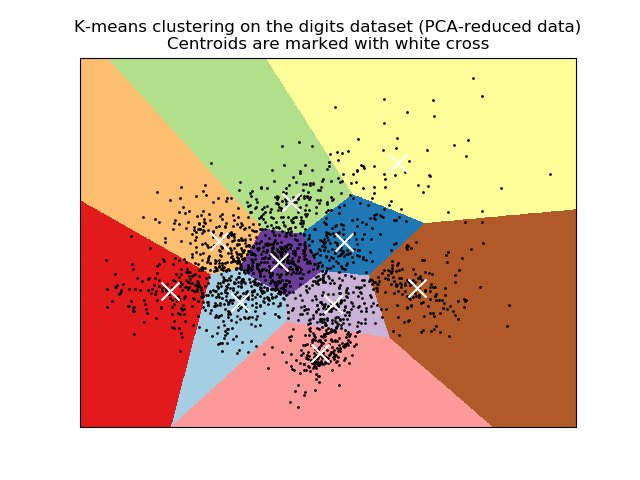

## Step by step K-Means behavior

In [1]:
#### RUN THIS CELL ONCE ######
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

is_random = 0

n_samples = 1500
ind_param = 0  # 0:fail | 1:slow | 2:init dependant (slow) | 3:init dep.(fail) | 4:slow(7 clus.) | 5:fail
param = [[117, 170, 37, 37, 37, 178], [117, 164, 3, 156, 55, 49], [5, 5, 5, 5, 7, 7], [5, 5, 5, 5, 7, 7]]

In [29]:
#### RUN THIS CELL WHEN YOU WANT TO CHOOSE THE NEXT SET OF PARAMETERS ####
if is_random : 
    random_state = np.random.randint(200)    
    random_state_2 = np.random.randint(200)  
    true_nb = 7
    chosen_nb = 7
else :
    random_state   = param[0][ind_param]
    random_state_2 = param[1][ind_param]
    true_nb    = param[2][ind_param]
    chosen_nb = param[3][ind_param]

print(random_state, random_state_2, true_nb, chosen_nb)
X, y = make_blobs(n_samples=n_samples, centers = true_nb, random_state=random_state)
ind  = 1
ind_param += 1

37 3 5 5


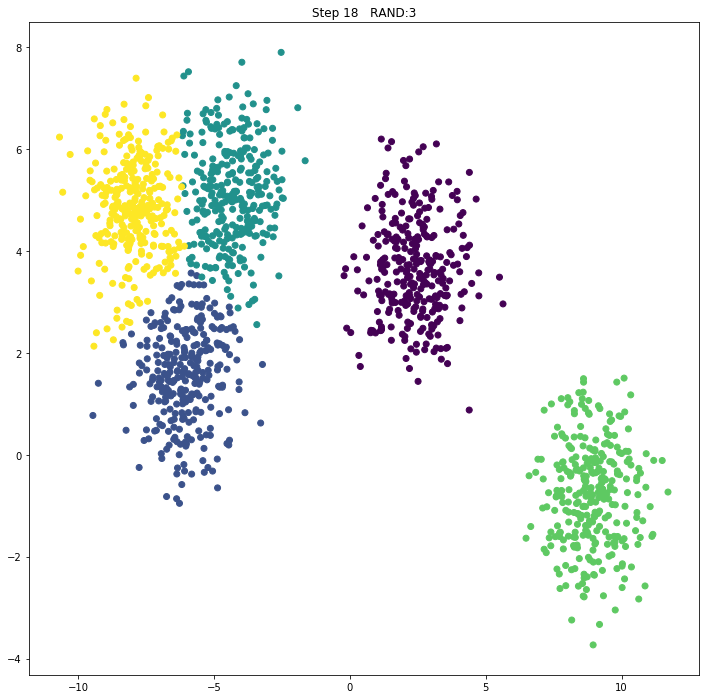

In [46]:
#### RUN THIS CELL TO SEE THE NEXT STEP OF K-MEANS ALGORITHM ####
plt.figure(figsize=(12, 12))
if ind == 1 : 
    clusterer = KMeans(n_clusters= chosen_nb, init='random', max_iter = 1, 
                      random_state=random_state_2,
                       n_init=1) 
else : 
    new_init = clusterer.cluster_centers_
    clusterer = KMeans(n_clusters=chosen_nb, init=new_init, max_iter = 1, n_init=1) 

y_pred = clusterer.fit_predict(X)
ind+=1

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Step "+str(ind)+"   RAND:"+str(random_state_2))
plt.show()

## Initialization is important
Several solutions exist : 
 * run the random initialization several times (`n_init` parameter of `KMEans`)
 * special initialization that tends to chose distant initialization points (`k-mean++` value of `init` parameter)

## K-Means behavior when type data varies

What appens when : 
 * we don't choose the correct number of clusters
 * the data are anisotropic
 * the standard deviation varies from one cluster to another
 * the numbers of points in a cluster are uneven
 
In the first three plots, the input data does not conform to some **implicit assumption** that k-means makes and undesirable clusters.

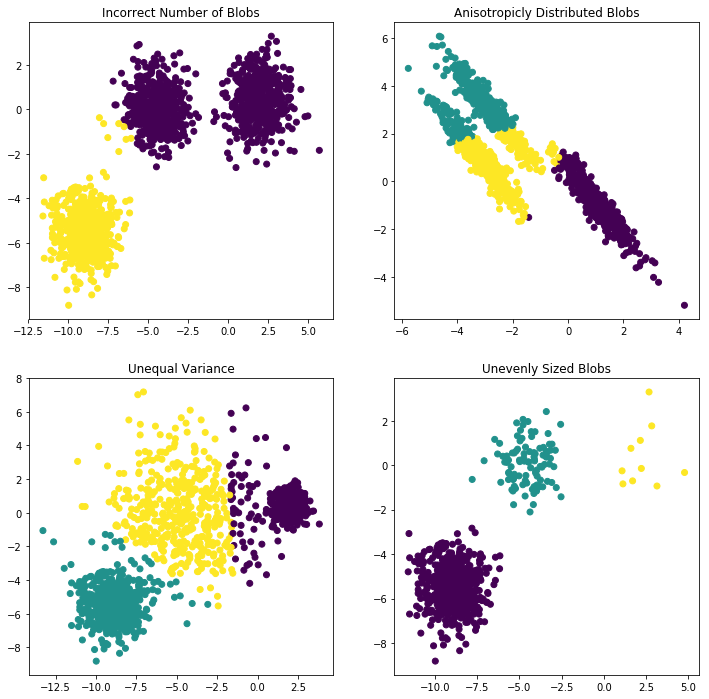

In [47]:
%matplotlib inline
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)
plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

## Choosing the number of clusters

We will use the *inertia* value to choose an appropriate number of clusters.

Of course, inertia will allways decrease when the number of clusters increase, so we stop the increase the number of clusters when the improvement is not important enough.


### Exercise 1

For the data below, plot the inertia after running the K-Means algorithm versus the number of clusters chosen.


In [48]:
X1, y1 = make_blobs(n_samples=n_samples, centers = 5, random_state=117)
X2, y2 = make_blobs(n_samples=n_samples, centers = 5, random_state=170)


### Exercise 2

Find a way to improve the result of K-Means in the cas of anisotropic data.
Write a processing for the data below


In [50]:
# Anisotropicly distributed data
X, y = make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

## Hierarchical clustering

*Unsupervised* version of the kNN
As the kNN, whilst it is a non-parametric method, it still assumes that the metric is meaning full… _cf._ later.

**Implemented** in `sklearn` as `sklearn.cluster.AgglomerativeClustering`.

We are going to perform clustering of pixels from a spectral image : data is organised in a order-3 tensor. First 2 axis corresponds respectively to the Y and X (spatial) dimensions; the last axis is energy (the spectral dimension)

In [52]:
import h5py

f = h5py.File("spectral_image.h5", 'r')
d=f["/spectral/image2"][:,:,:] ## To make it a numpy array
print("dimensions of the spectral image :", d.shape)


dimensions of the spectral image : (50, 75, 1780)


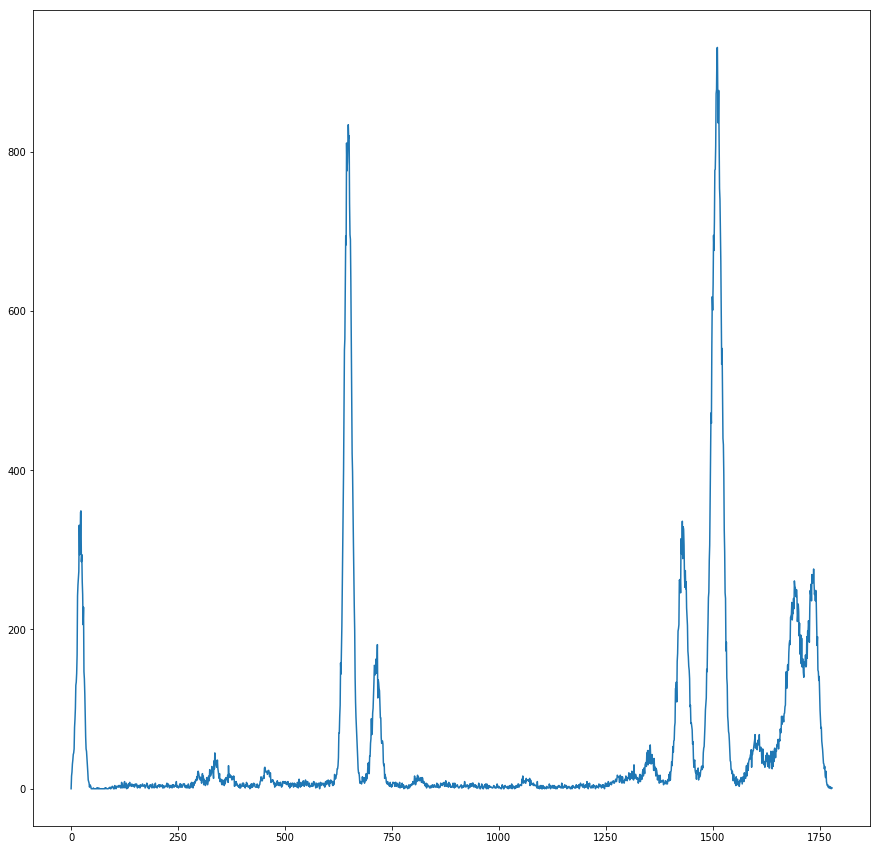

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

## Exploring a bit the data :
## A spectra
plt.figure(figsize=(15, 15))
plt.plot(d[20, 20, :])

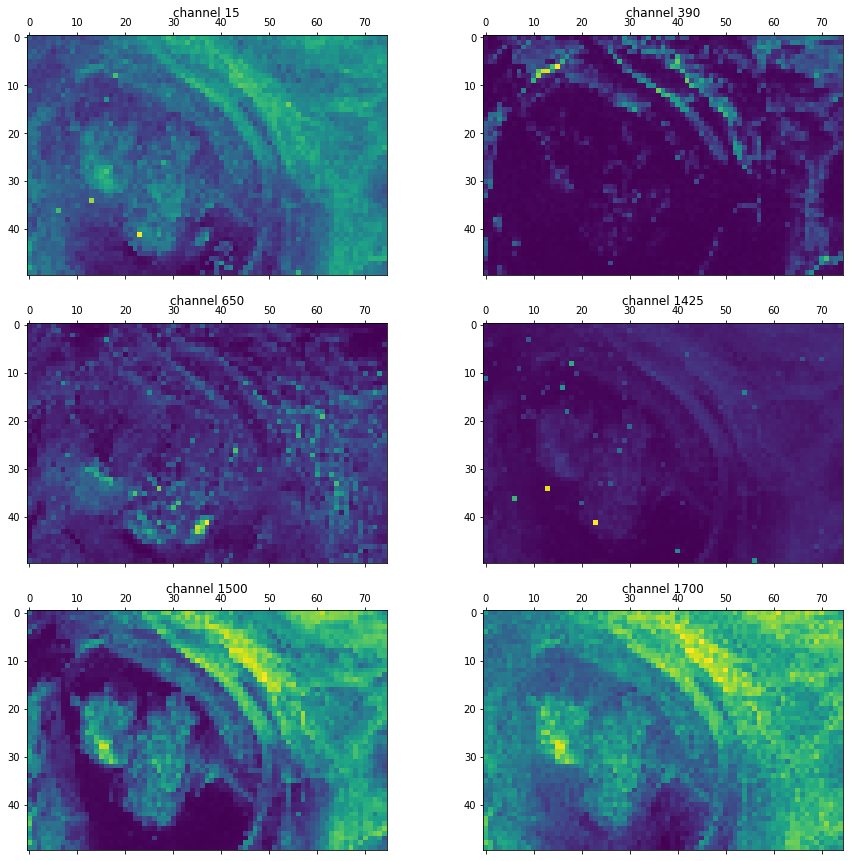

In [54]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs[0, 0].set_title("channel 15")
axs[0, 0].matshow(d[:, :, 15])

axs[0, 1].set_title("channel 390")
axs[0, 1].matshow(d[:, :, 390])

axs[1, 0].set_title("channel 650")
axs[1, 0].matshow(d[:,:,650])

axs[1, 1].set_title("channel 1425")
axs[1, 1].matshow(d[:,:,1425])

axs[2, 0].set_title("channel 1500")
axs[2, 0].matshow(d[:,:,1500])

axs[2, 1].set_title("channel 1700")
axs[2, 1].matshow(d[:,:,1700])

minimal value : 0


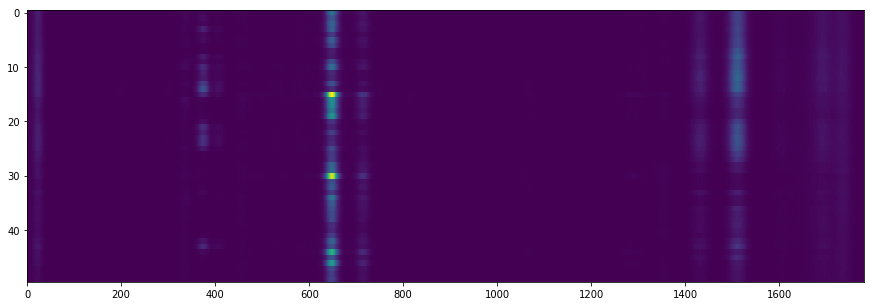

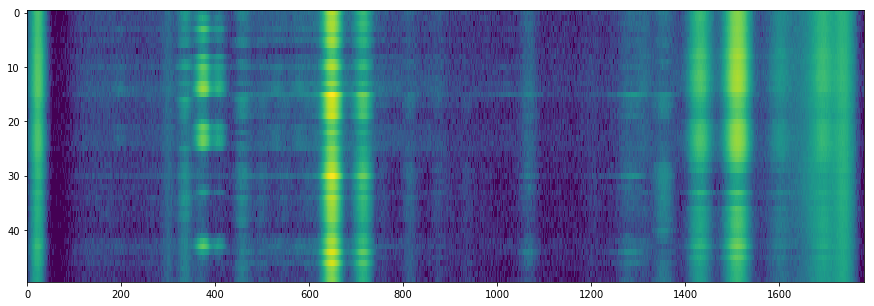

In [55]:
## Finally, displaying a transect of the image, the line x=22 :
plt.figure(figsize=(15, 5))
plt.imshow(d[:, 48, :], aspect="auto", interpolation='none')

import numpy
print("minimal value :", numpy.min(d[:, 48, :]))

## Log scale, but adding 1 :
plt.figure(figsize=(15, 5))
plt.imshow(numpy.log(1+d[:, 48, :]), aspect="auto", interpolation='none')

We want to cluster the pixels based on their spectral similarities, using hierarchical clustering

To be able to do that, we have to start by rearranging the data so that they fit to sklearn expectation.

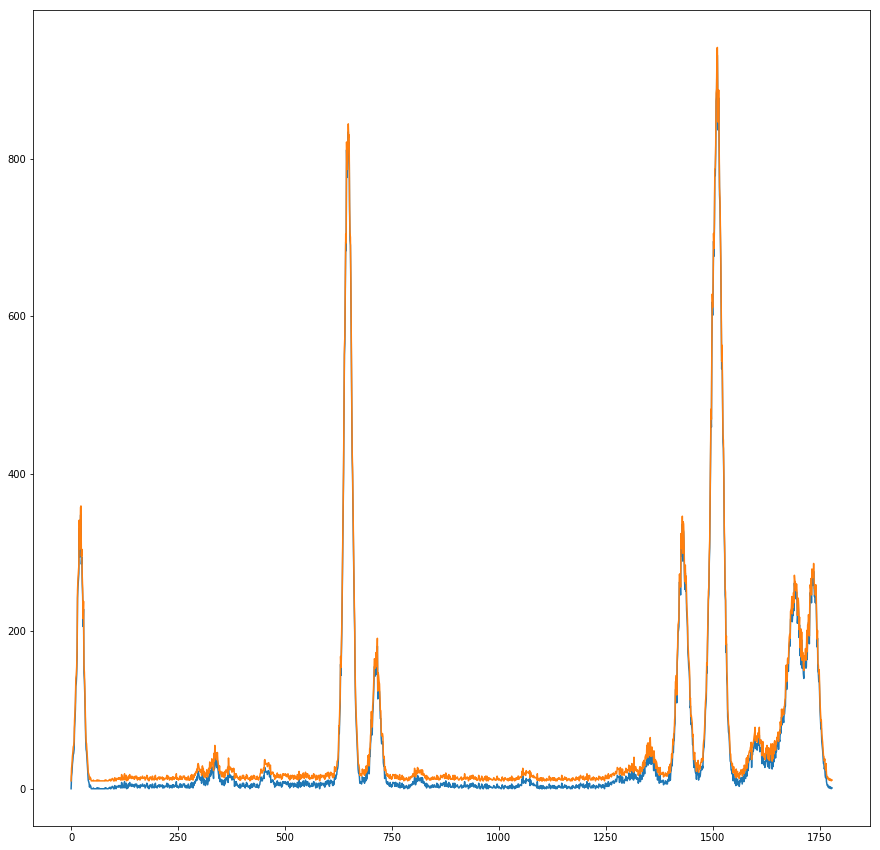

In [56]:
## Unfolding the Y dimension so we get a 2-array (1 row per pixel, 1 column per energy)
d_2d = d.reshape( (d.shape[0]*d.shape[1],d.shape[2]), order='C')

## Checking we got it right :
plt.figure(figsize=(15, 15))
plt.plot(d[20, 20, :])
plt.plot(d_2d[20*d.shape[1]+20, :]+10)

In [58]:
from sklearn.cluster import AgglomerativeClustering

hclust = AgglomerativeClustering()

In [59]:
%%time
clusters = hclust.fit_predict(d_2d)

CPU times: user 8.68 s, sys: 136 ms, total: 8.81 s
Wall time: 8.85 s


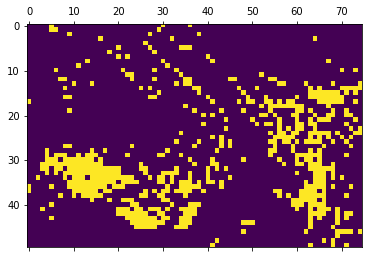

In [60]:
## Generating the various possible classification :
seg_2 = clusters.reshape( d.shape[0:2], order="C")
plt.matshow(seg_2)

CPU times: user 8.3 s, sys: 92.4 ms, total: 8.39 s
Wall time: 8.41 s


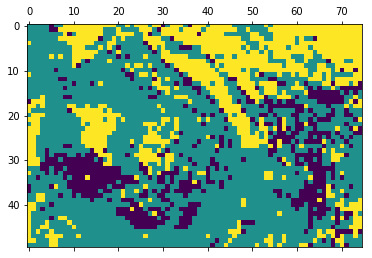

In [61]:
%%time
seg_3 = AgglomerativeClustering(n_clusters=3).fit_predict(d_2d).reshape(d.shape[0:2], order="C")
plt.matshow(seg_3)

CPU times: user 8.68 s, sys: 103 ms, total: 8.78 s
Wall time: 8.88 s


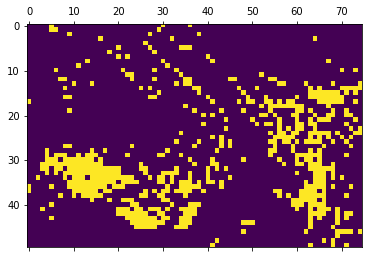

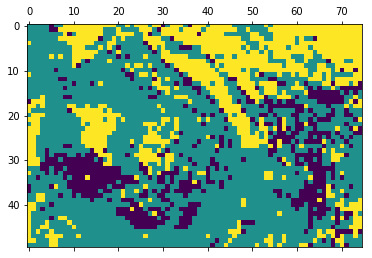

In [62]:
%%time

## Using cache (through 'memory') avoids reperforming the computation for each numbre of class.
seg_2 = AgglomerativeClustering( n_clusters=2 , memory="here-temp").fit_predict(d_2d).reshape( d.shape[0:2] )
plt.matshow(seg_2)

seg_3 = AgglomerativeClustering( n_clusters=3, memory="here-temp").fit_predict(d_2d).reshape( d.shape[0:2] )
plt.matshow(seg_3)

CPU times: user 250 ms, sys: 0 ns, total: 250 ms
Wall time: 250 ms


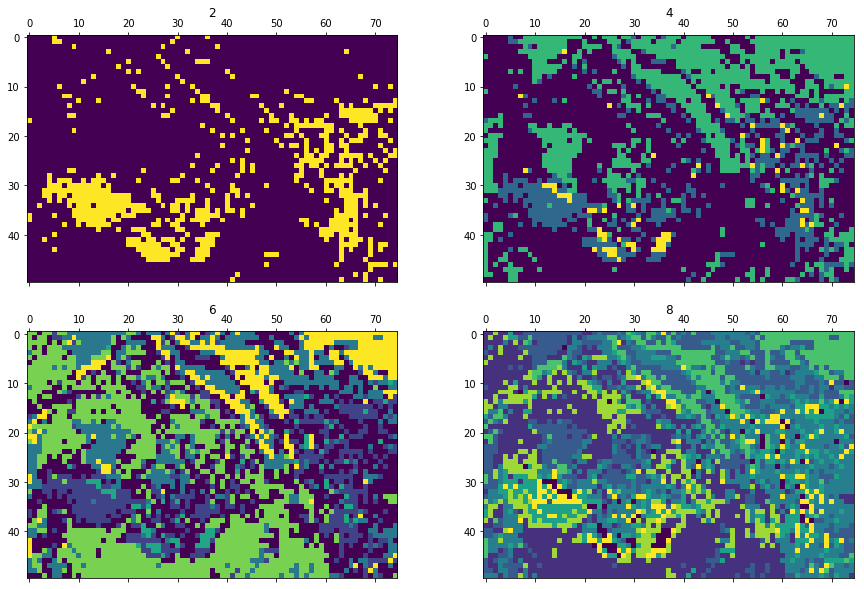

In [63]:
%%time
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()) :
    seg = AgglomerativeClustering(n_clusters=2+2*i,memory="here-temp" )\
          .fit_predict(d_2d).reshape(d.shape[0:2], order="C")
    ax.matshow(seg)
    ax.set_title(2+2*i)

Testing other metrics and linkage scores (dissimilarities between two spectrat and _dissimilarities_ between _class_).

In [69]:
import sklearn
sklearn.__version__

'0.19.2'

ValueError: Unknown linkage type single.Valid options are dict_keys(['ward', 'complete', 'average'])

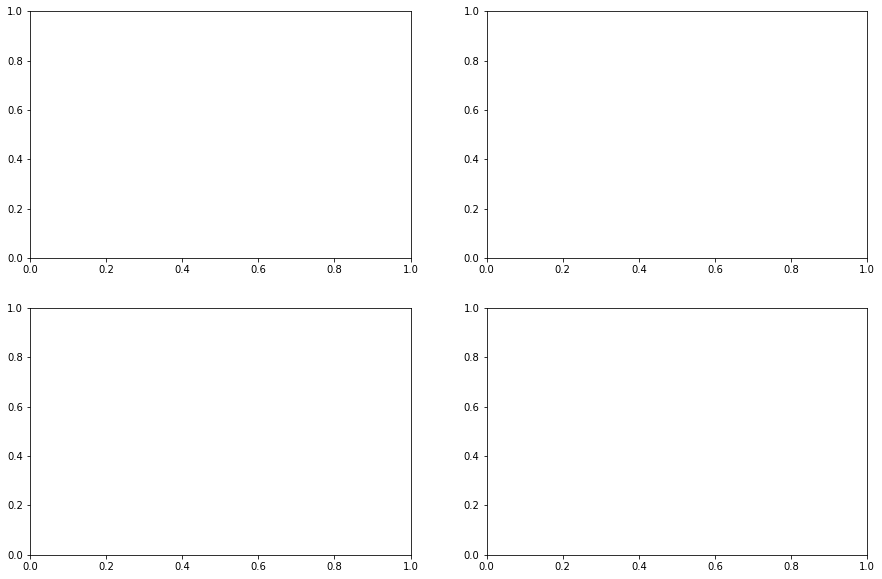

In [66]:
%%time
### RETURNS AN ERROR IF sklearn version is lower than 0.20
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
## Using 'single linkage'
for i, ax in enumerate(axs.flatten()) :
    seg = AgglomerativeClustering( n_clusters=i+4,memory="here-temp", linkage='single' )\
    .fit_predict(d_2d).reshape(d.shape[0:2], order="C")
    ax.matshow(seg)
    ax.set_title(i+4)

CPU times: user 8.9 s, sys: 138 ms, total: 9.04 s
Wall time: 9.05 s


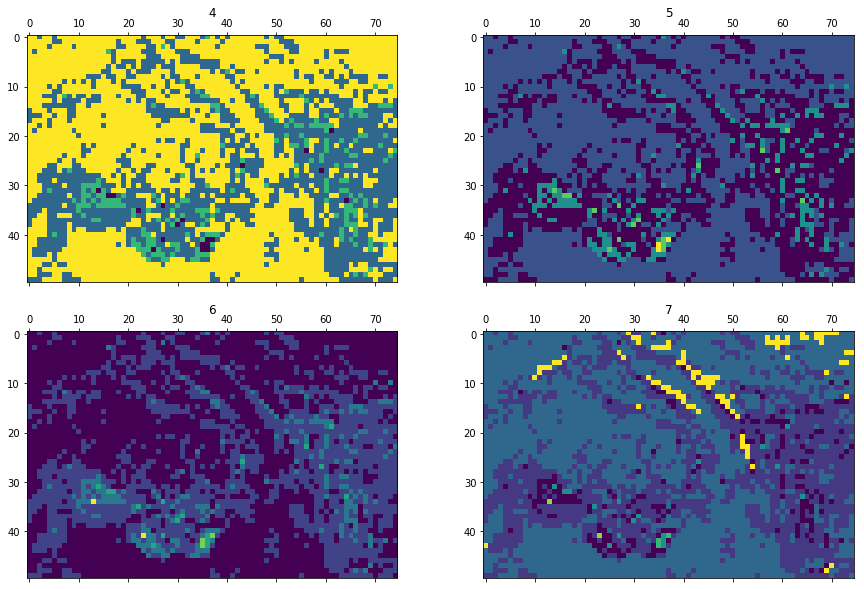

In [70]:
%%time
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
## Using 'complete linkage'
for i, ax in enumerate(axs.flatten()) :
    seg = AgglomerativeClustering( n_clusters=i+4,memory="here-temp", linkage='complete'  )\
    .fit_predict(d_2d).reshape(d.shape[0:2], order="C")
    ax.matshow(seg)
    ax.set_title(i+4)

CPU times: user 9.2 s, sys: 157 ms, total: 9.36 s
Wall time: 9.38 s


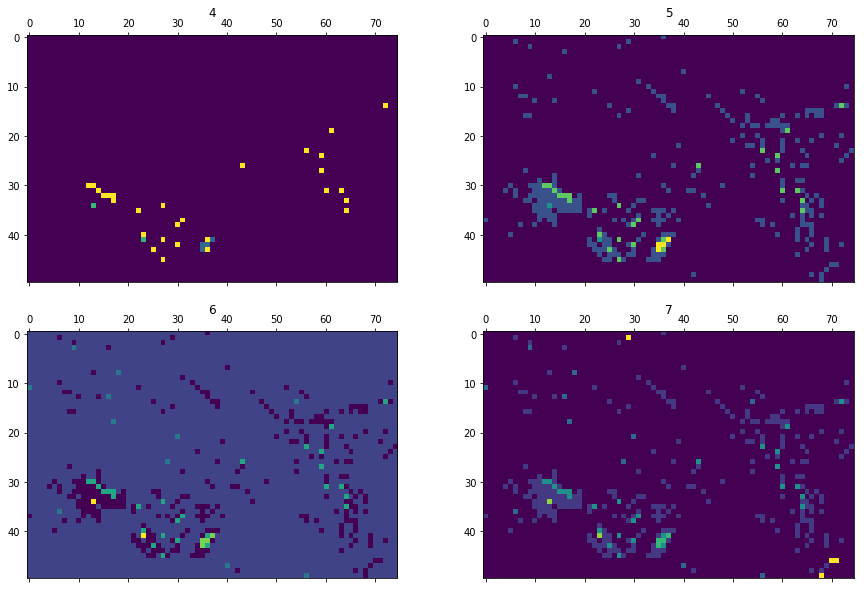

In [71]:
%%time
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
## Using 'average linkage'
for i, ax in enumerate(axs.flatten()) :
    seg = AgglomerativeClustering( n_clusters=i+4,memory="here-temp", linkage='average')\
    .fit_predict(d_2d).reshape(d.shape[0:2], order="C")
    ax.matshow(seg)
    ax.set_title(i+4)

One can have some understanding of the effect of linkage looking at the demonstration from sklearn : [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py)

## Effect of scaling

Here, again, we might perform some _pre-scaling_ of the data : this has a strong influence on the initialisation of what `sklearn.cluster.AggloramerativeCluster` calls `affinity`, and is then propagated as the input of the `linkage` computing the dissimilarity between sets of pixels

CPU times: user 9.48 s, sys: 514 ms, total: 9.99 s
Wall time: 10 s


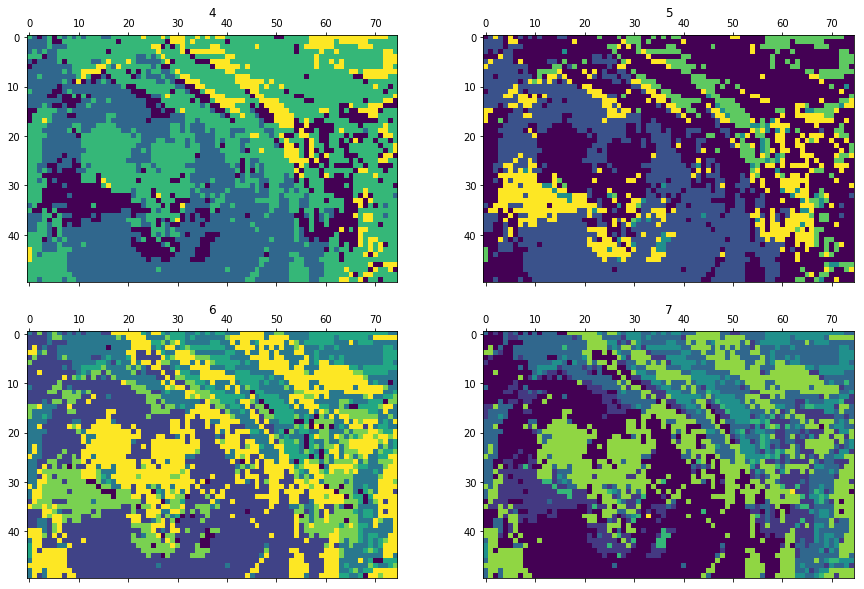

In [72]:
%%time

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import warnings

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

## Do as before but inserting a StandardScaler at the beggining of the processing.

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()) :
    seg = make_pipeline( StandardScaler(),AgglomerativeClustering(n_clusters = i+4,memory="here-temp" ))\
    .fit_predict(d_2d).reshape(d.shape[0:2], order="C")
    ax.matshow(seg)
    ax.set_title(i+4)

Another scaling renders the `Ward` method (with euclidian distance) a close relative to $\chi^2$ homogreneity test statitics :

In [73]:
scale = numpy.sqrt(numpy.sum(d_2d, axis=0))
d_2d_scaled = d_2d / scale

/home/archives/prog/anaonda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [75]:
## Means that scale contains some 0 :
print("Number of 0 in scale :", numpy.sum(scale == 0)) ## There is one 0
print("Channel with 0 sum is :", numpy.argwhere(scale==0))

Number of 0 in scale : 1
Channel with 0 sum is : [[0]]


In [76]:
## Since the values are positive: sum=0 means it is ALWAYS 0… no contrast.
scale[scale==0] = 1
d_2d_scaled = d_2d / scale

In [77]:
### And makig all spectrum sum to 1.0
scale = numpy.sum(d_2d_scaled, axis=1).reshape(-1,1)
d_2d_scaled2 = d_2d_scaled / scale

CPU times: user 9.35 s, sys: 108 ms, total: 9.46 s
Wall time: 9.48 s


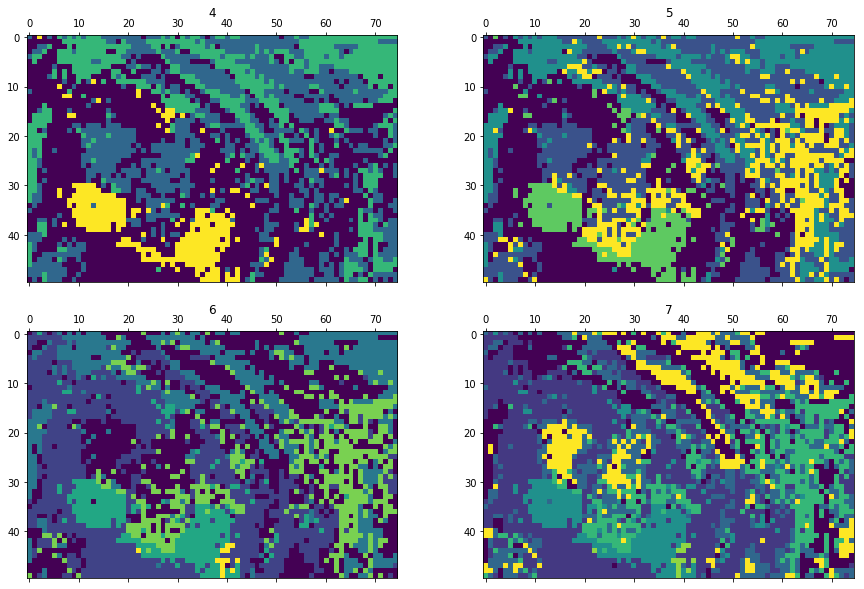

In [78]:
%%time

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()) :
    seg = AgglomerativeClustering(n_clusters=(i+4), memory="here-temp")\
    .fit_predict(d_2d_scaled2).reshape(d.shape[0:2], order="C")
    ax.matshow(seg)
    ax.set_title(i+4)

## Shortcomings…

Indeed `sklearn.cluster.AgglomerativeClustering` lacks a set of output and representations. It is still very useful within a `pipeline`, but to have more options and a better reporting/representation of the results.

These, however, are accessible in python using the `scipy.cluster.hierarchy` module

We will concentrate on the **Ward** linkage and using various scalings, but other linkage are also available in `scipy.cluster.hierarchy` ([documentation](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)).

In particular, on top of `ward`, `single`, `complete` and `average`, the version from `scipy` also proposes `weighted` and `median`. But, unless you want to use the *euclidian* distance, you will have to compute the distance through another function: the `scipy.spatial.distance.pdist` function (documented [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html)). Indeed the `linkage` function propose a shortcut if you want to use a distance exposed by `pdist`.

In [79]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import numpy

## Still data in d_2d and d_2d_scaled2 (depending on the scaling)

In [80]:
%%time
clusters_nos = linkage(d_2d, method="ward", metric="euclidean")

CPU times: user 8.46 s, sys: 114 ms, total: 8.57 s
Wall time: 8.59 s


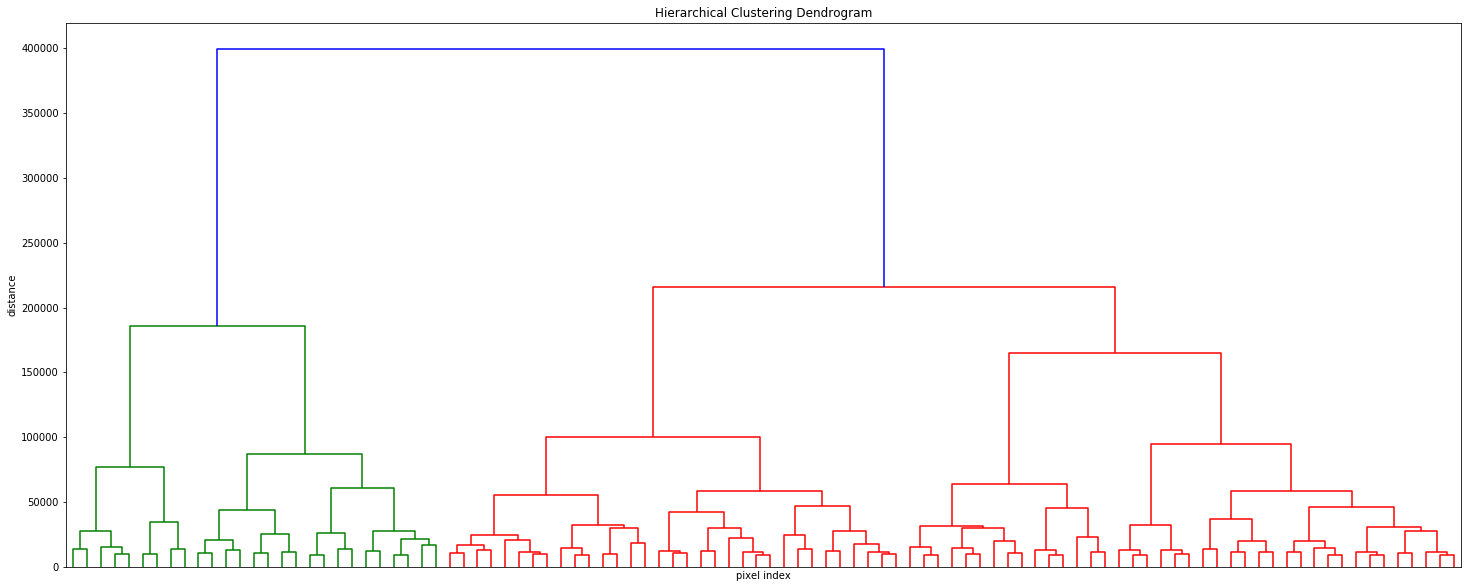

In [81]:
%matplotlib inline

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('pixel index')
plt.ylabel('distance')
dendrogram(
    clusters_nos,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=100,  # show only the last p merged clusters
    no_labels=True,
)
plt.show()

We can use also the output to get some information on the hierarchy of the agglomeration and the _cost_ of each grouping.

The format of the output is a `N-1` by 4 `numpy.ndarray`. Each row corresponds to an agglomeration and the columns are as follow :
0. The index of the first merged class
1. The index of the second merged class
2. The distance/linkage of the merge
3. The number of pixels contained in the created class

Each merge creates a _new class_ which is indexed by the iteration number (plus the number of _singular pixel class_). Hence the first merged class (2 pixels) is indexed 3750…

In [82]:
print("Shape of the result:", clusters_nos.shape)
print("First 10 merges:\n", clusters_nos[0:10, :])
print("Last 10 merges:\n", clusters_nos[-10:, :])
print(numpy.min(clusters_nos, axis=0))
print(numpy.max(clusters_nos, axis=0))

Shape of the result: (3749, 4)
First 10 merges:
 [[3.54800000e+03 3.54900000e+03 2.05358224e+02 2.00000000e+00]
 [3.32000000e+03 3.55000000e+03 2.15074406e+02 2.00000000e+00]
 [3.39600000e+03 3.75000000e+03 2.18519259e+02 3.00000000e+00]
 [3.47200000e+03 3.70100000e+03 2.19556371e+02 2.00000000e+00]
 [3.62300000e+03 3.70200000e+03 2.40520269e+02 2.00000000e+00]
 [3.48700000e+03 3.71000000e+03 2.49140523e+02 2.00000000e+00]
 [3.75200000e+03 3.75300000e+03 2.53799002e+02 5.00000000e+00]
 [3.47300000e+03 3.54700000e+03 2.60297906e+02 2.00000000e+00]
 [3.63500000e+03 3.70800000e+03 2.69365922e+02 2.00000000e+00]
 [3.62200000e+03 3.69700000e+03 2.69506957e+02 2.00000000e+00]]
Last 10 merges:
 [[7.46700000e+03 7.47000000e+03 6.10463051e+04 3.67000000e+02]
 [7.47600000e+03 7.48300000e+03 6.37186901e+04 9.90000000e+02]
 [7.46900000e+03 7.47900000e+03 7.69631653e+04 7.70000000e+01]
 [7.48200000e+03 7.48900000e+03 8.66506651e+04 5.36000000e+02]
 [7.47800000e+03 7.48800000e+03 9.46569139e+04 1.18

The _linkage_ function is related to the _cost_ or _approximation loss_ incured by putting in the same class pixels which are not exactly the same…

As such it is monotonicaly increasing when the number of class decreases. We can caraterise this increasing speed:

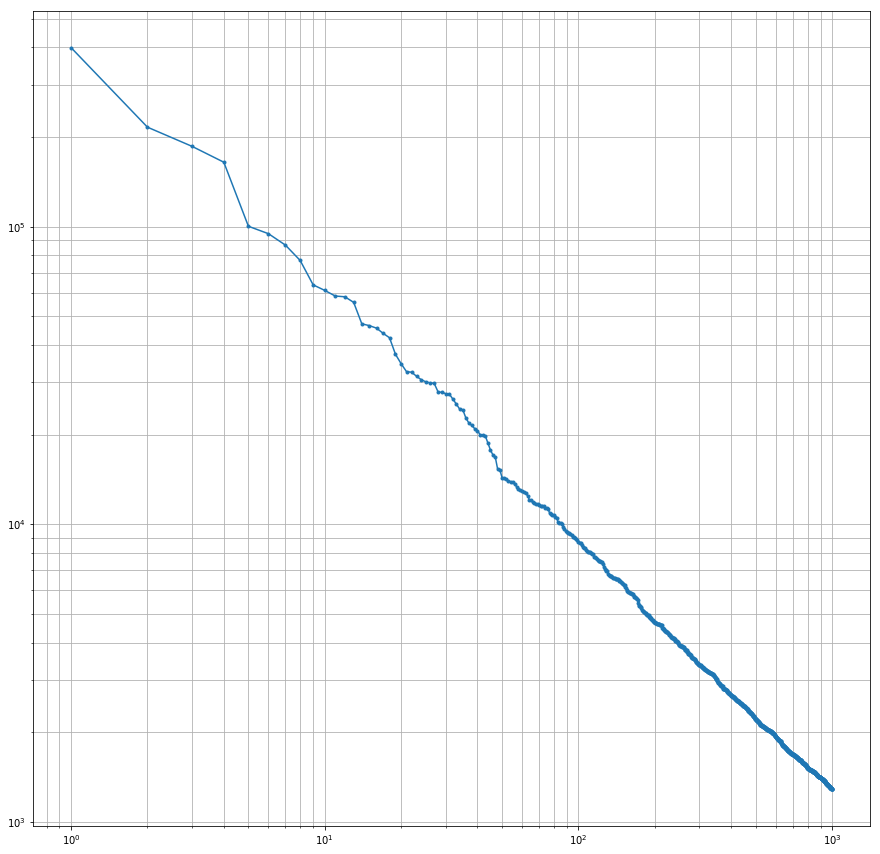

In [83]:
%matplotlib inline

## the last 50, but reversed, so index is number of remaining class-1
last_100_ESS=clusters_nos[-1:-1000:-1, 2] 
plt.figure(figsize=(15, 15))
plt.plot(range(1, len(last_100_ESS)+1, 1), last_100_ESS, marker='.')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.grid(True, which='minor', axis='both')

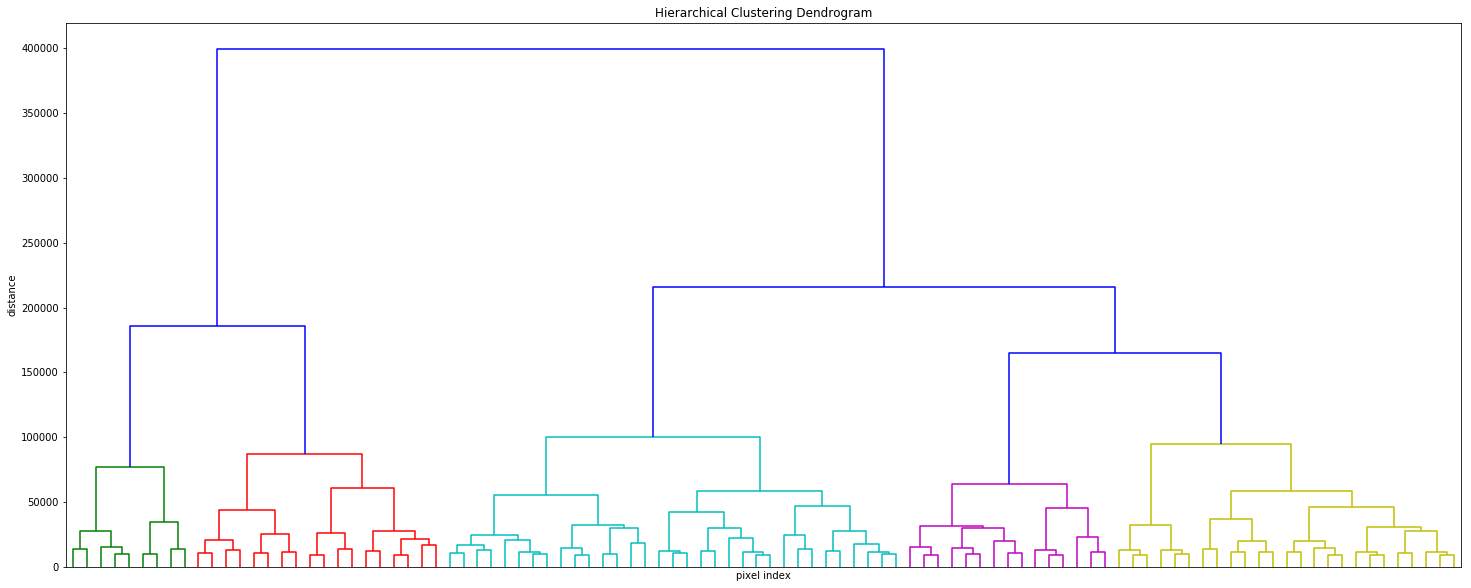

In [84]:
%matplotlib inline

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('pixel index')
plt.ylabel('distance')
dendrogram(
    clusters_nos,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=100,  # show only the last p merged clusters
    no_labels=True,
    color_threshold=120e3,
)
plt.show()

Text(0.5, 1.0, '5 classes')

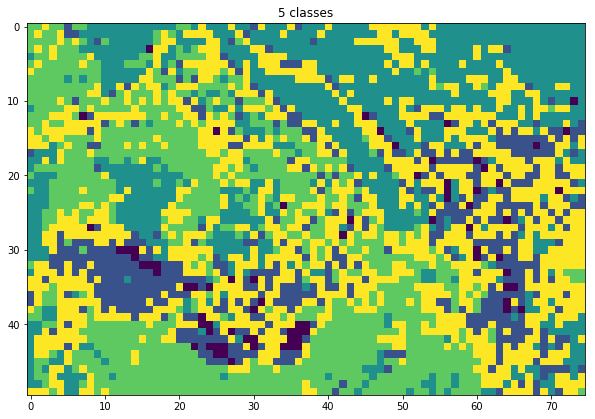

In [85]:
## Plotting the result onto the image :
from scipy.cluster.hierarchy import fcluster

seg = fcluster(clusters_nos, 5, criterion='maxclust').reshape(d.shape[0:2], order="C")
plt.figure(figsize=(10, 7))
plt.imshow(seg)
plt.title("5 classes")

### With _standard scaling_

This correspond to making sure that each canal is both mean-centered and with a unitary variance.

In [86]:
%%time

## Centering :
d_centers = numpy.mean(d_2d, axis=0)
d_2d_centered = d_2d - d_centers

## Bringing variance to 1
d_vars = numpy.var(d_2d_centered, axis=0)
d_vars[d_vars==0] = 1
d_2d_standard = d_2d_centered / numpy.sqrt(d_vars)

## Performing the clustering :
clusters_standard = linkage(d_2d_standard, method="ward", metric="euclidean")

CPU times: user 8.65 s, sys: 165 ms, total: 8.81 s
Wall time: 8.88 s


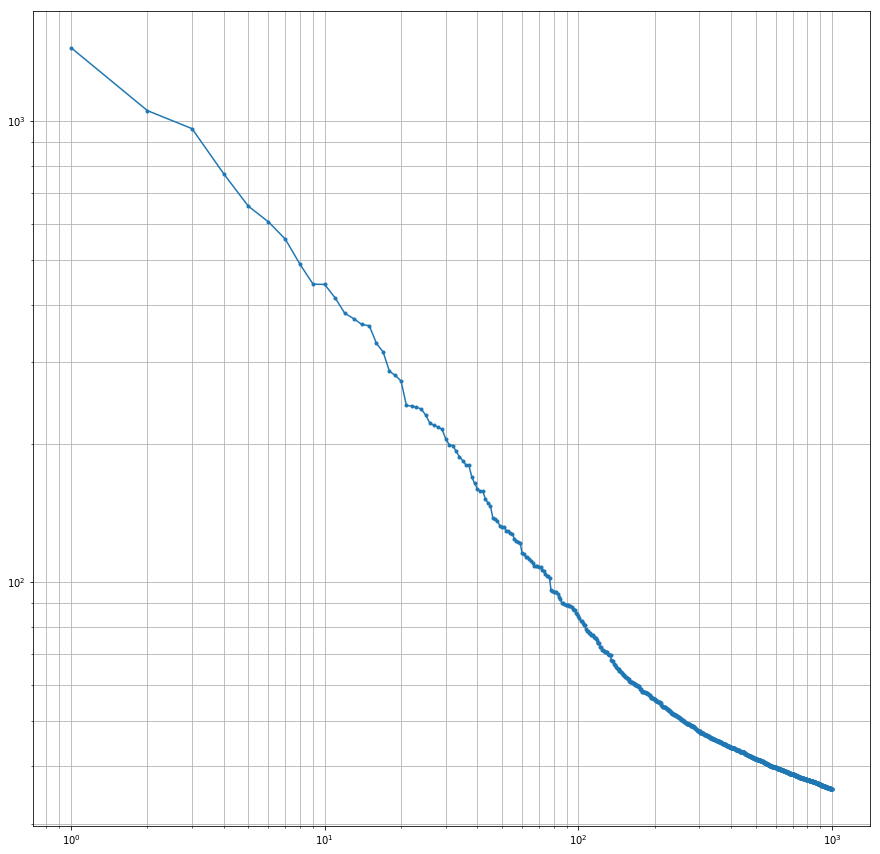

In [87]:
last_100_ESS=clusters_standard[-1:-1000:-1, 2] 

plt.figure(figsize=(15, 15))
plt.plot(range(1, len(last_100_ESS)+1, 1), last_100_ESS, marker='.')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.grid(True, which='minor', axis='both')

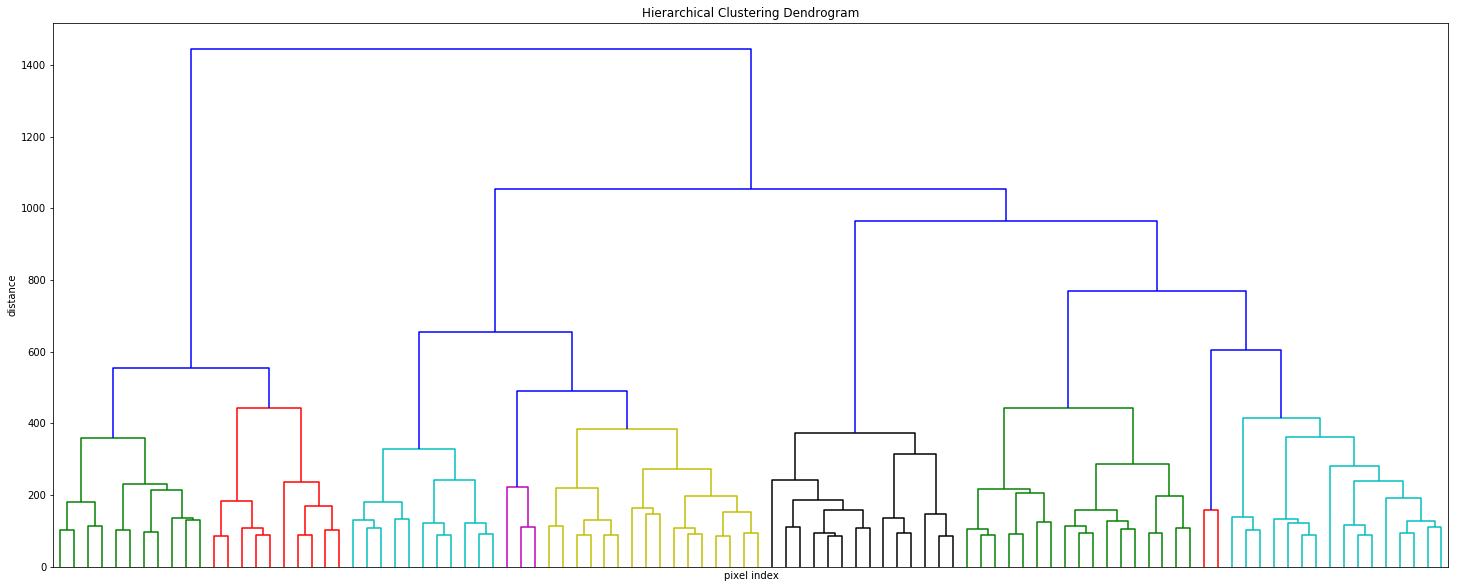

Text(0.5, 1.0, '9 classes')

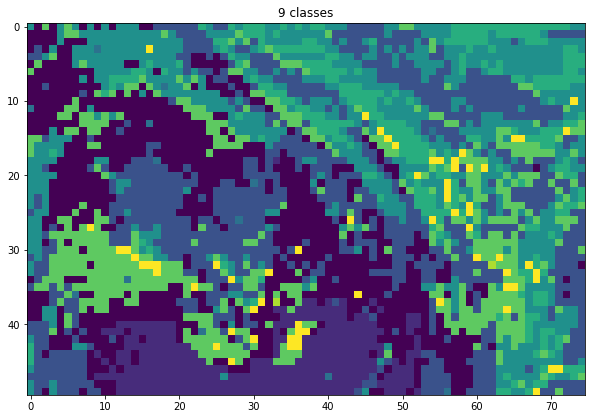

In [88]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('pixel index')
plt.ylabel('distance')
dendrogram(
    clusters_standard,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=100,  # show only the last p merged clusters
    no_labels=True,
    color_threshold=450,
)
plt.show()

seg = fcluster(clusters_standard, 9, criterion='maxclust').reshape(d.shape[0:2], order="C")
plt.figure(figsize=(10, 7))
plt.imshow(seg)
plt.title("9 classes")

### With $\chi^2$ related scaling

In [89]:
%%time
## The same, using Chi2 type scaling :
clusters_chi2 = linkage(d_2d_scaled2, method="ward", metric="euclidean")

CPU times: user 8.6 s, sys: 110 ms, total: 8.71 s
Wall time: 8.72 s


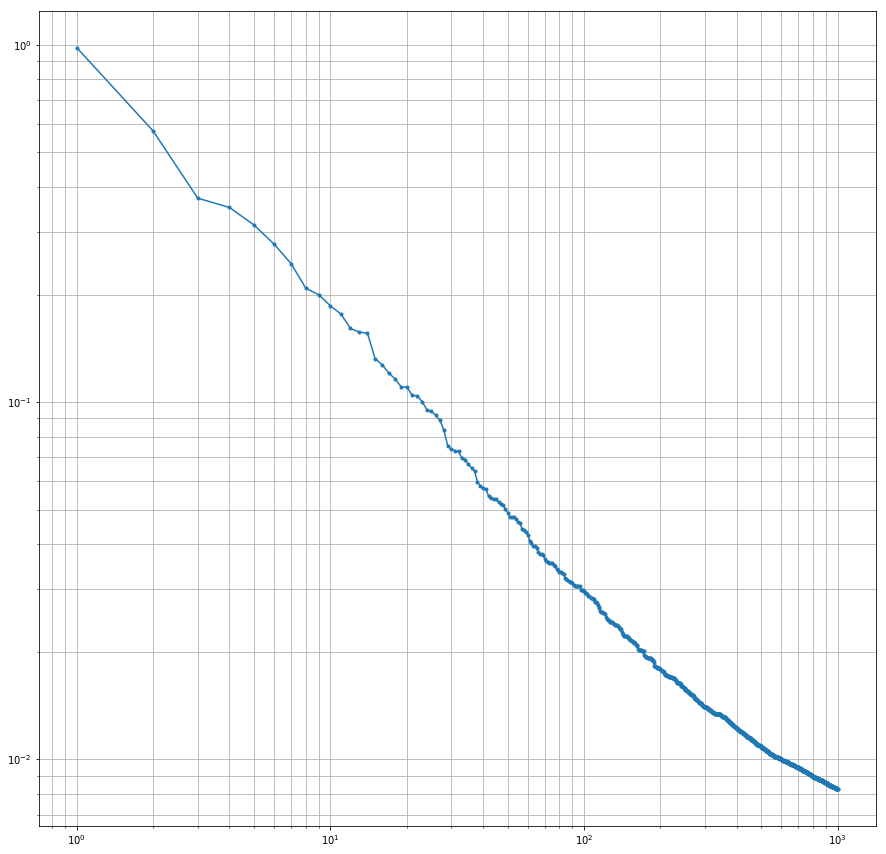

In [90]:
last_100_ESS=clusters_chi2[-1:-1000:-1, 2] 

plt.figure(figsize=(15, 15))
plt.plot(range(1, len(last_100_ESS)+1, 1), last_100_ESS, marker='.')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.grid(True, which='minor', axis='both')

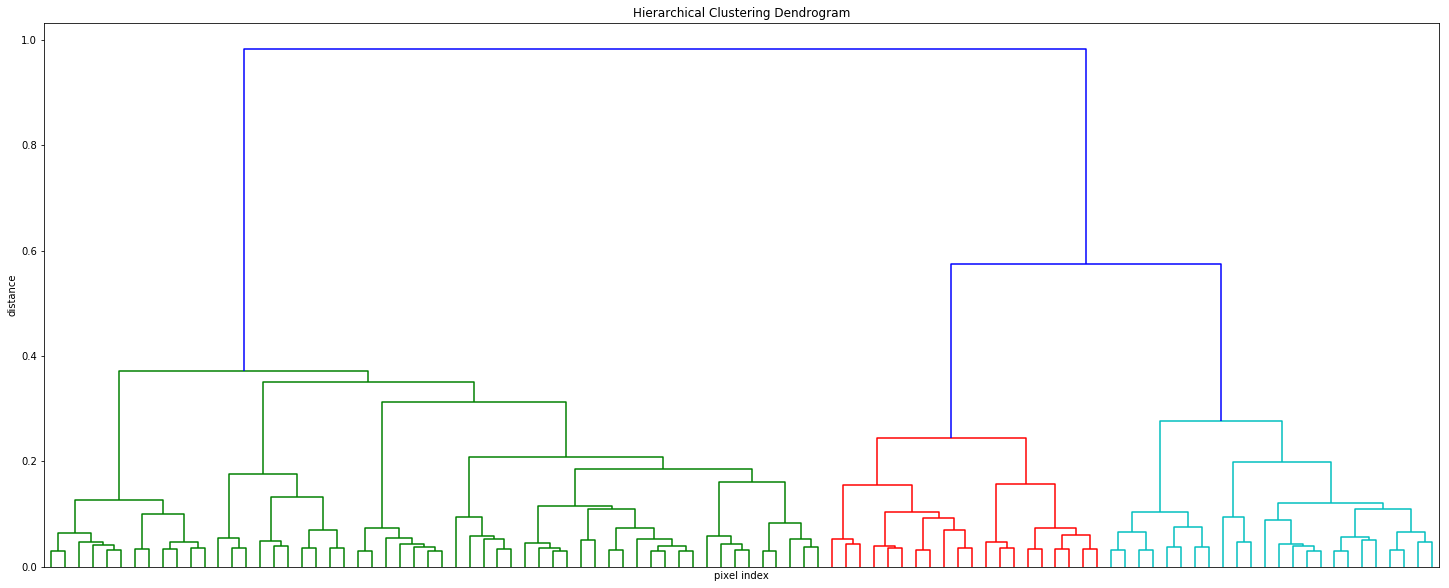

Text(0.5, 1.0, '3 classes')

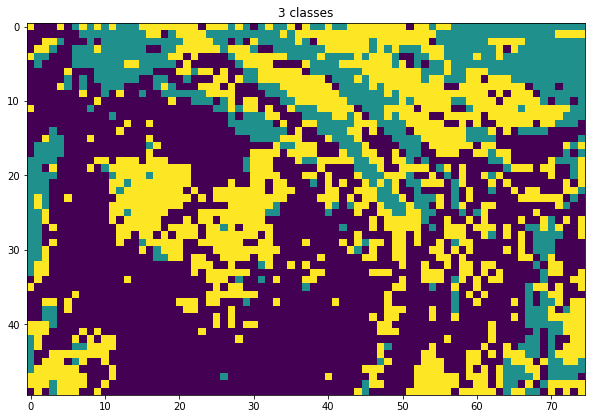

In [91]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('pixel index')
plt.ylabel('distance')
dendrogram(
    clusters_chi2,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=100,  # show only the last p merged clusters
    no_labels=True,
    color_threshold=.4,
)
plt.show()

seg = fcluster(clusters_chi2, 3, criterion='maxclust').reshape(d.shape[0:2], order="C")
plt.figure(figsize=(10, 7))
plt.imshow(seg)
plt.title("3 classes")

### Visual qualitative criterion

### No scaling 
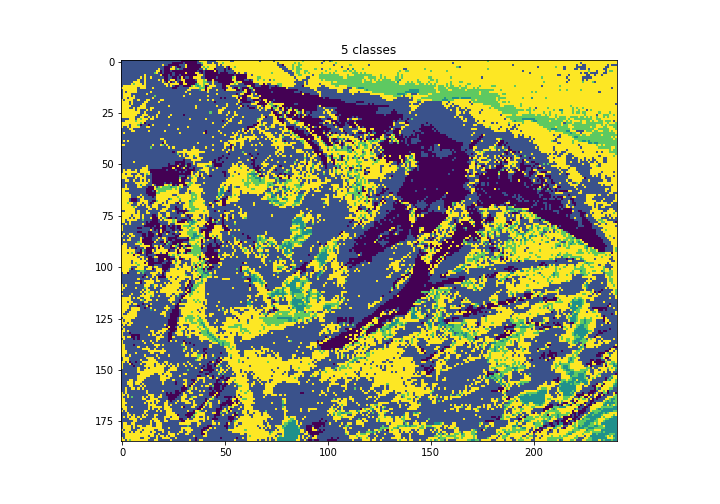

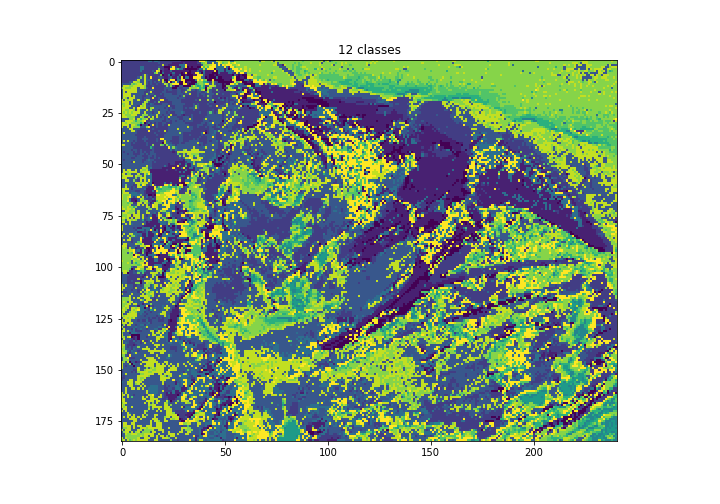

### Standard scaling
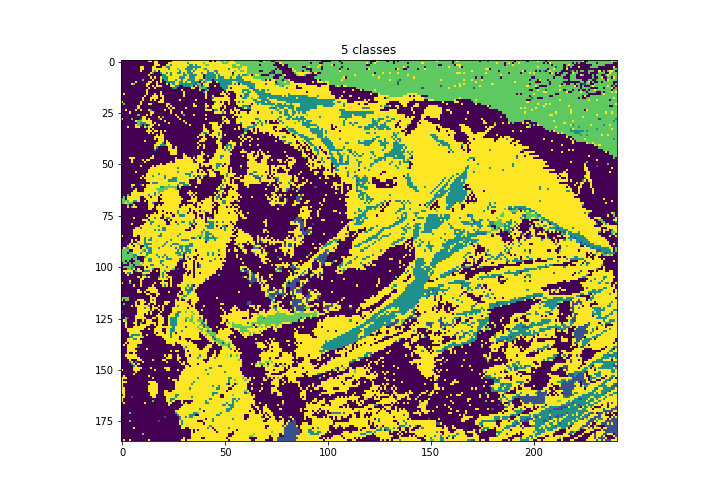

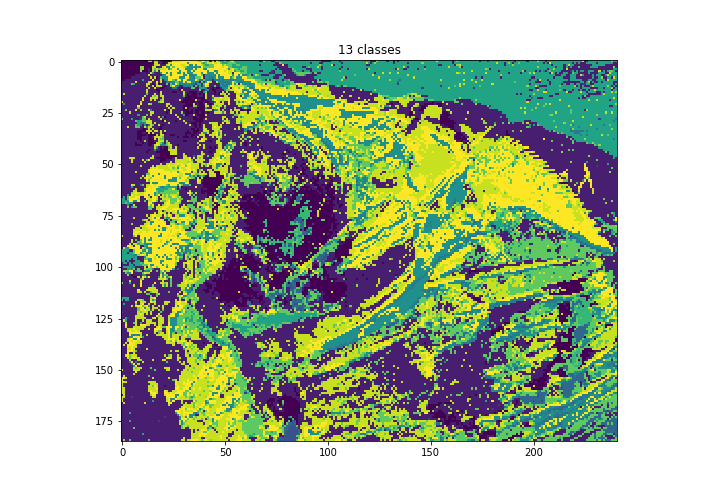

### "chi-2" scaling
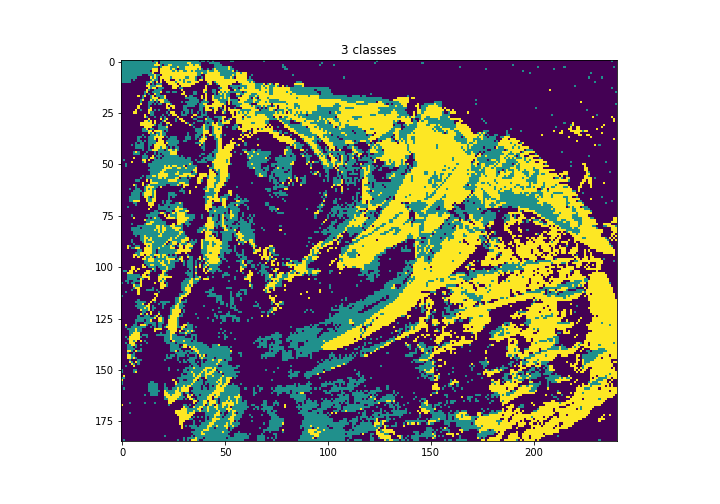

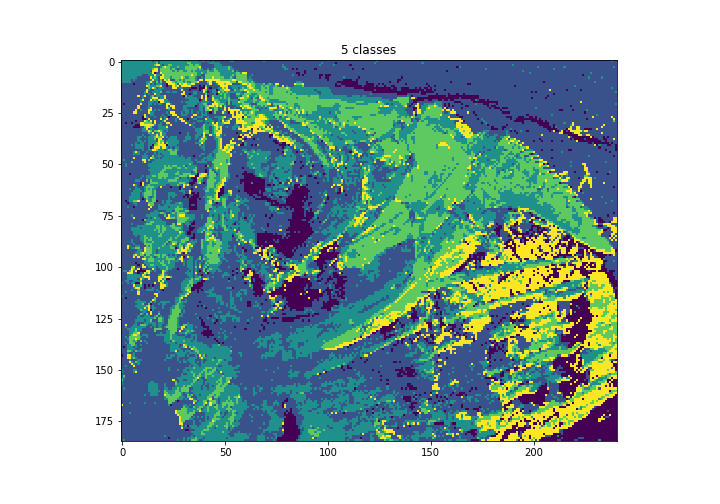

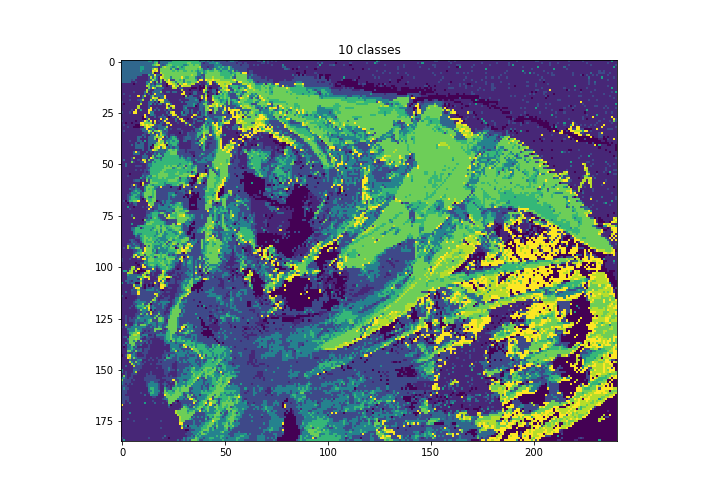


### Copyrights

####  Section K-Means behavior when type data varies BSD-3-Clause
Copyright (C) Phil Roth <mr.phil.roth@gmail.com>

#### Rest of the notebook
Copyright (C)  2017-2020  Serge Cohen, Bertrand Monfort, Frédéric-Emmanuel Picca under GDFL <a class="anchor" id="GFDL"></a>

Permission is granted to copy, distribute and/or modify this document under the terms of the GNU Free Documentation License, Version 1.3 or any later version published by the Free Software Foundation;   
with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.

A copy of the license is included in the section entitled "[GNU Free Documentation License](https://www.gnu.org/licenses/fdl-1.3-standalone.html)".